In [1]:
import os
os.chdir("C:\DilipKumar\Machine Learning\KaggleCompetition\TitanicSurvival")

In [2]:
print(os.getcwd())

C:\DilipKumar\Machine Learning\KaggleCompetition\TitanicSurvival


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset & observe top 5 rows
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Observe the last 5 rows
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Load Test dataset and observe top 5 rows
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# check the column info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#check the train data statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#check the train data no.of rows & no. of columns
train_df.shape

(891, 12)

In [10]:
#check the test data no.of rows & no. of columns
test_df.shape

(418, 11)

In [11]:
#extract the categorical features
categorical = [var for var in train_df.columns if train_df[var].dtype == 'O']
print("There are {} categorical variables in train dataset".format(len(categorical)))
print("The categorical columns are : ",categorical)

There are 5 categorical variables in train dataset
The categorical columns are :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [12]:
numerical = list(set(train_df.columns) - set(categorical))

In [13]:
#extract the numerical features
#numerical = [var for var in train_df.columns if train_df[var].dtype != 'O']
print("There are {} numerical variables in train dataset".format(len(numerical)))
print("The numerical columns are : ",numerical)

There are 7 numerical variables in train dataset
The numerical columns are :  ['Pclass', 'SibSp', 'Age', 'Parch', 'Fare', 'Survived', 'PassengerId']


In [14]:
#check frequency table of categorical variables / features
for var in categorical:
    print(train_df[var].value_counts())

Daly, Mr. Peter Denis                                 1
Plotcharsky, Mr. Vasil                                1
Johnston, Mr. Andrew G                                1
Slayter, Miss. Hilda Mary                             1
Hays, Mrs. Charles Melville (Clara Jennings Gregg)    1
                                                     ..
van Billiard, Mr. Austin Blyler                       1
Ilmakangas, Miss. Pieta Sofia                         1
Newsom, Miss. Helen Monypeny                          1
Andrews, Miss. Kornelia Theodosia                     1
Giglio, Mr. Victor                                    1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
CA. 2343     7
1601         7
347082       7
CA 2144      6
3101295      6
            ..
36568        1
237798       1
367228       1
PC 17759     1
A4. 54510    1
Name: Ticket, Length: 681, dtype: int64
G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
    

In [15]:
#check frequency of target variable
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
# percentage distribution 
train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
#check if null values are present in categorical features
for var in categorical:
    print(var, train_df[var].isnull().sum())

Name 0
Sex 0
Ticket 0
Cabin 687
Embarked 2


In [18]:
# Inspect null value count of 'Cabin'
train_df['Cabin'].isnull().sum()

687

In [19]:
# Inspect Cabin further, it shows non null values = 204 and null values = 687
train_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Survived'}>],
       [<AxesSubplot:title={'center':'PassengerId'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

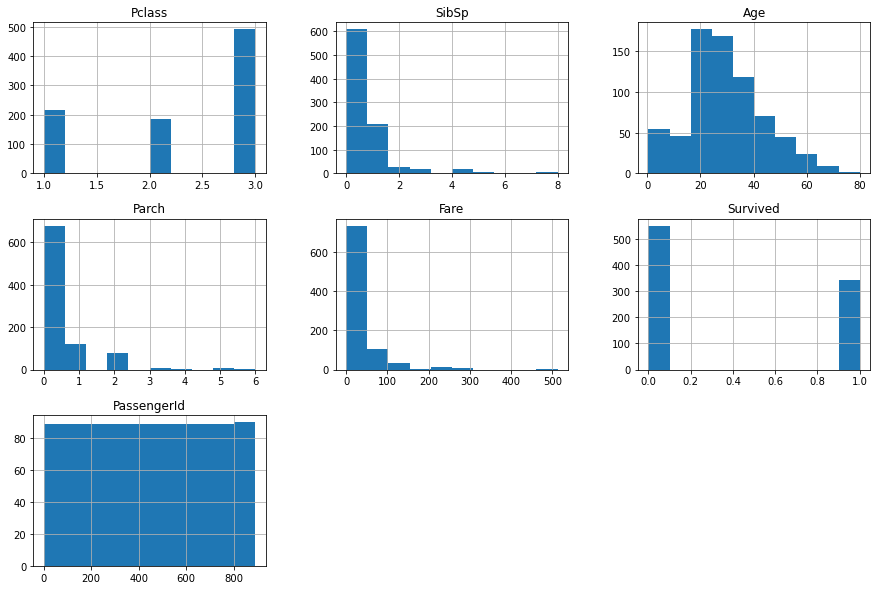

In [20]:
# Visualization & Analysis
# Univariate Analysis
# Quantitative variables
# Histogram
train_df[numerical].hist(figsize=(15,10))

In [21]:
#from above plots, we can infer that Age of the passengers were skewed right and most of the age group between 20 to 30

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

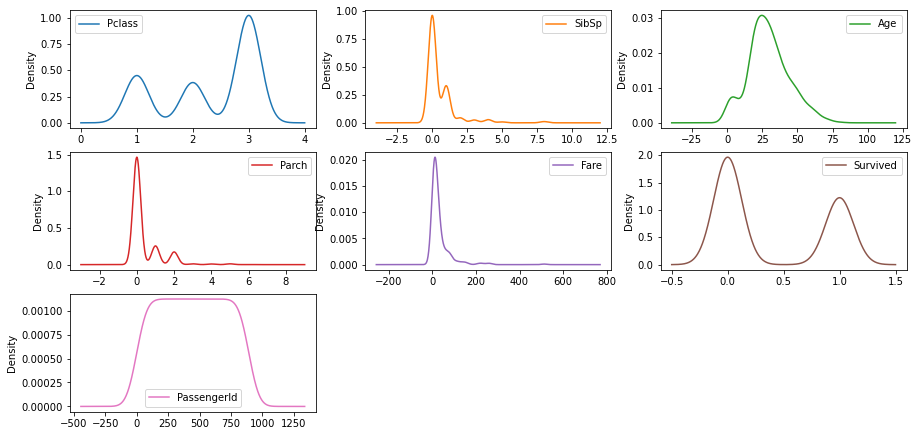

In [22]:
#Density plots
train_df[numerical].plot(
    kind = "density", subplots = True, layout = (4,3), sharex = False, figsize = (15,10)
)

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

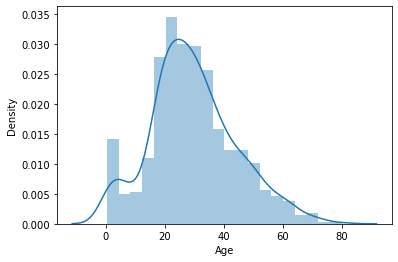

In [23]:
#Distribution plot using Seaborn
sns.distplot(train_df['Age'])

<AxesSubplot:xlabel='Fare'>

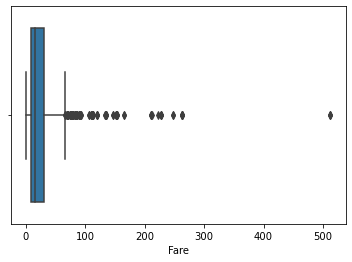

In [24]:
#Bot plot using seaborn
sns.boxplot(x = 'Fare', data = train_df)

In [25]:
# Fare has some outliers

<AxesSubplot:xlabel='Embarked', ylabel='count'>

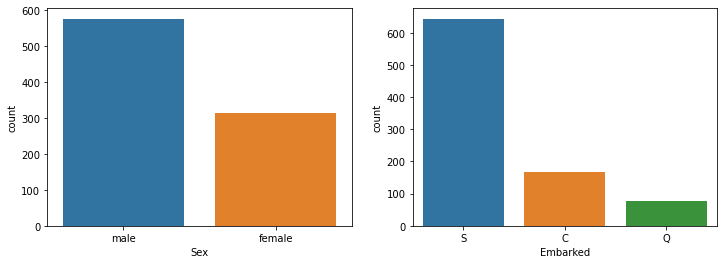

In [26]:
# Categorical variables
# Barplot
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,4))
sns.countplot(x="Sex",data=train_df,ax=axes[0])
sns.countplot(x="Embarked",data=train_df,ax=axes[1])

<AxesSubplot:>

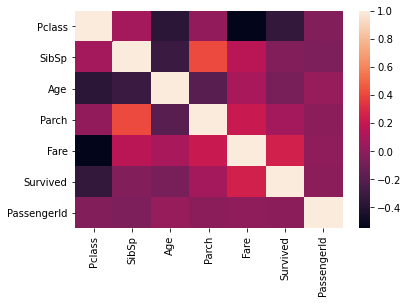

In [27]:
#Multivariate plots
#Quantitative vs Quantitative
#Correlation matrix
corr_matrix = train_df[numerical].corr()
sns.heatmap(corr_matrix)

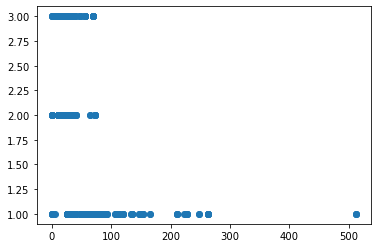

In [28]:
#Scatter plot
plt.scatter(train_df["Fare"],train_df["Pclass"])

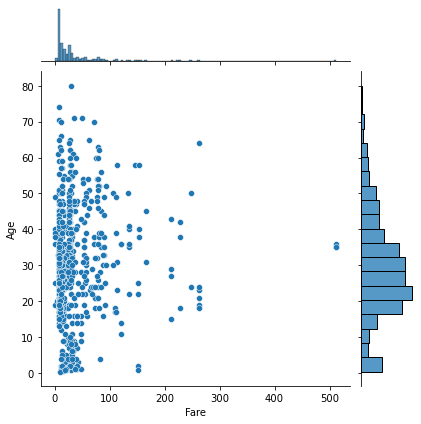

In [29]:
#Jointplot
sns.jointplot(x="Fare",y="Age",data=train_df,kind="scatter")

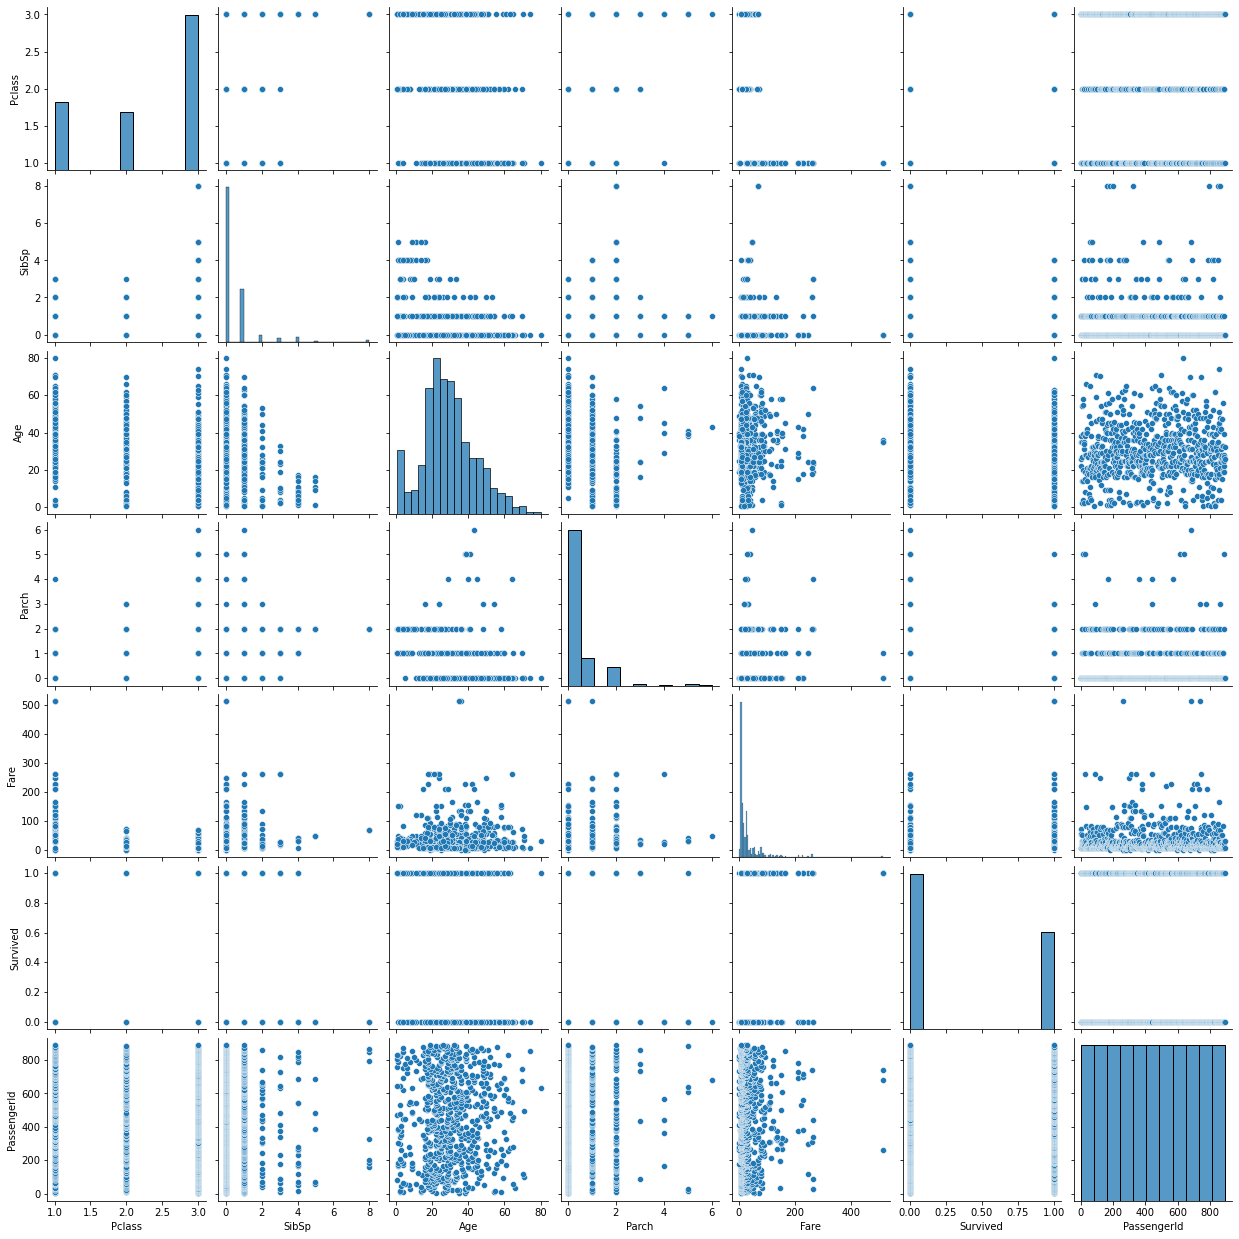

In [30]:
#scatterplot matrix
%config InlineBackend.figure_format = 'png'
sns.pairplot(train_df[numerical]);

In [31]:
%config InlineBackend.figure_format = 'retina'

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


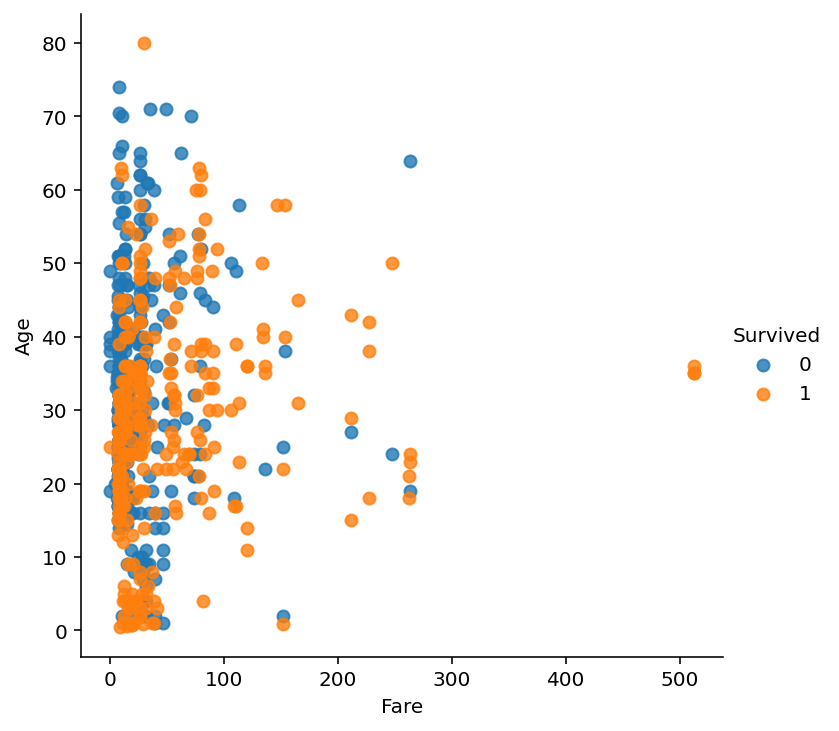

In [32]:
#Quantitative vs Categorical
sns.lmplot("Fare","Age",data=train_df,hue="Survived",fit_reg=False)

<AxesSubplot:xlabel='Sex', ylabel='count'>

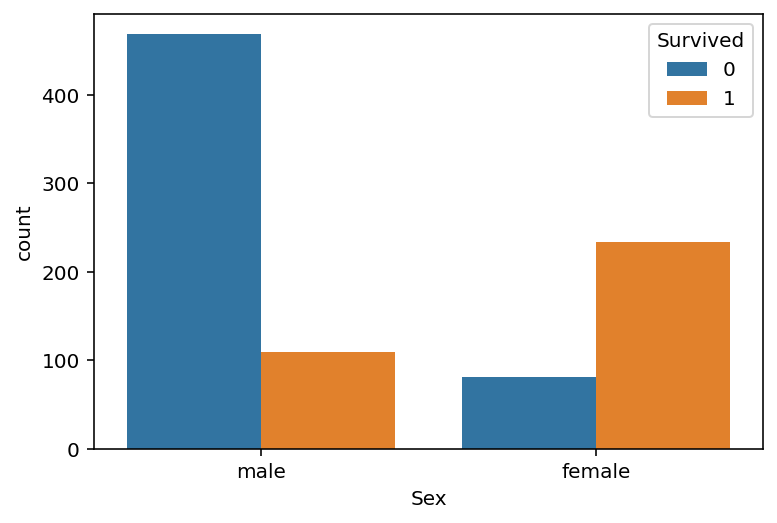

In [33]:
#Categorical vs Categorical
sns.countplot(x="Sex",hue="Survived",data=train_df)

<AxesSubplot:xlabel='Fare', ylabel='count'>

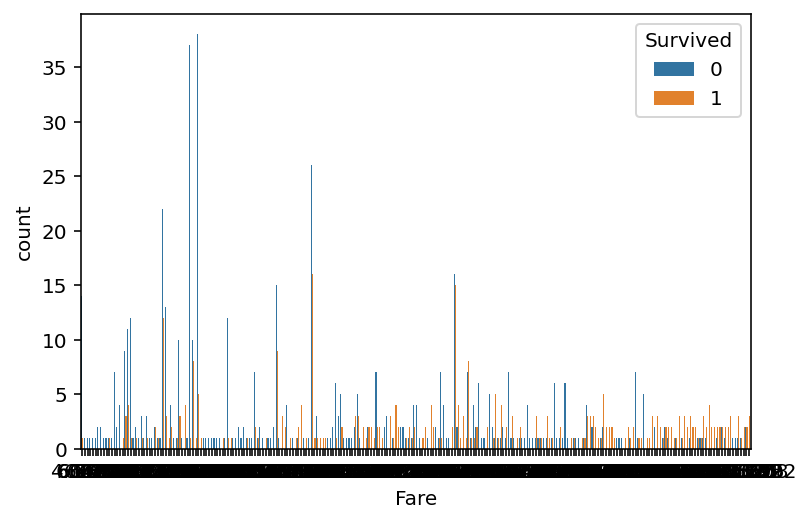

In [34]:
sns.countplot(x="Fare",hue="Survived",data=train_df)

In [35]:
#Feature Engineering
# Handle missing values
# Age has missing values and needs to be checked
train_df['Age'].isnull().sum()

177

In [36]:
test_df['Age'].isnull().sum()

86

In [37]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [38]:
#check the most frequent Age value
train_df['Age'].mode()[0]

24.0

In [39]:
# replace Null values with mode
mode = train_df['Age'].mode()[0]
train_df['Age'].fillna(mode,inplace=True)

In [40]:
# similarly handle null values for Age column in Test Data
mode = test_df['Age'].mode()[0]
test_df['Age'].fillna(mode,inplace=True)

In [41]:
train_df['Age'].isnull().sum()

0

In [42]:
test_df['Age'].isnull().sum()

0

In [43]:
train_df['Age'].describe()

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [44]:
#Age is handled, now check Cabin
train_df['Cabin'].isnull().sum()

687

In [45]:
train_df[train_df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S


In [46]:
#It seems Cabin has values if Pclass is 1, for 2 & 3, Cabin value is missing, so it is safe to remove Cabin as it is same as Pclass

In [47]:
#drop cabin columns
train_df.drop(columns='Cabin',axis = 1, inplace=True)
test_df.drop(columns='Cabin',axis = 1, inplace=True)

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [49]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [50]:
# Embarked has also null values. Again this is not significant to decide if survived or not, so we can drop this column
train_df.drop(columns='Embarked',axis = 1, inplace=True)
test_df.drop(columns='Embarked',axis = 1, inplace=True)

In [51]:
train_df.isnull().any().sum()

0

In [52]:
test_df.isnull().any().sum()

1

In [53]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
dtype: int64

In [54]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN


In [55]:
test_df['Fare'].fillna(test_df[test_df['Pclass'] == 3]['Fare'].mean(),inplace=True)

In [56]:
#drop PassengerID column as well
train_df.drop(columns='PassengerId',axis = 1, inplace=True)
test_df.drop(columns='PassengerId',axis = 1, inplace=True)

In [57]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [58]:
#Split the name and fetch the title alone. There can be relation between so & so person and survival
Title = train_df['Name'].str.split(" ")
Title

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [59]:
Title[888][1]

'Miss.'

In [60]:
train_df['Title'] = train_df['Name']

In [61]:
for i in range(0, len(Title)):
    train_df['Title'][i] = Title[i][1]

<ipython-input-61-9cbf9abc7b8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Title'][i] = Title[i][1]


In [62]:
train_df['Title']

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

In [63]:
#Now title has been extracted
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Title
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,Rev.
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,Miss.
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,Miss.
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,Mr.
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Mr.


In [64]:
Title = test_df['Name'].str.split(" ")
test_df['Title'] = train_df['Name']
for i in range(0, len(Title)):
    test_df['Title'][i] = Title[i][1]

<ipython-input-64-1053c4eec6d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Title'][i] = Title[i][1]


In [65]:
#Drop Name column
train_df.drop(columns='Name',axis=1,inplace=True)

In [66]:
test_df.drop(columns='Name',axis=1,inplace=True)

In [67]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Mr.
1,1,1,female,38.0,1,0,PC 17599,71.2833,Mrs.
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Miss.
3,1,1,female,35.0,1,0,113803,53.1000,Mrs.
4,0,3,male,35.0,0,0,373450,8.0500,Mr.


In [68]:
train_df.iloc[:,4:7]

,SibSp,Parch,Ticket
0,1,0,A/5 21171
1,1,0,PC 17599
2,0,0,STON/O2. 3101282
3,1,0,113803
4,0,0,373450
...,...,...,...
886,0,0,211536
887,0,0,112053
888,1,2,W./C. 6607
889,0,0,111369


In [69]:
# Ticket number with prefix mostly relates to SibSp or Parch so it can be ignored, drop Ticket column
train_df.drop(columns = 'Ticket', axis = 1, inplace = True)

In [70]:
test_df.drop(columns = 'Ticket', axis = 1, inplace = True)

In [71]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,male,22.0,1,0,7.2500,Mr.
1,1,1,female,38.0,1,0,71.2833,Mrs.
2,1,3,female,26.0,0,0,7.9250,Miss.
3,1,1,female,35.0,1,0,53.1000,Mrs.
4,0,3,male,35.0,0,0,8.0500,Mr.


In [72]:
train_df['Age'] = pd.qcut(train_df['Age'],10,duplicates = 'drop')

In [73]:
test_df['Age'] = pd.qcut(test_df['Age'],10,duplicates = 'drop')

In [74]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,male,"(20.0, 24.0]",1,0,7.2500,Mr.
1,1,1,female,"(32.5, 38.0]",1,0,71.2833,Mrs.
2,1,3,female,"(24.0, 28.0]",0,0,7.9250,Miss.
3,1,1,female,"(32.5, 38.0]",1,0,53.1000,Mrs.
4,0,3,male,"(32.5, 38.0]",0,0,8.0500,Mr.


In [75]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,3,male,"(31.9, 39.0]",0,0,7.8292,Mr.
1,3,female,"(39.0, 48.0]",1,0,7.0000,Mrs.
2,2,male,"(48.0, 76.0]",0,0,9.6875,Mr.
3,3,male,"(24.0, 27.0]",0,0,8.6625,Mr.
4,3,female,"(21.0, 24.0]",1,1,12.2875,Mrs.


In [76]:
from sklearn.preprocessing import LabelEncoder
train_df['Age'] = LabelEncoder().fit_transform(train_df['Age'])

In [77]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,male,2,1,0,7.2500,Mr.
1,1,1,female,5,1,0,71.2833,Mrs.
2,1,3,female,3,0,0,7.9250,Miss.
3,1,1,female,5,1,0,53.1000,Mrs.
4,0,3,male,5,0,0,8.0500,Mr.


In [78]:
from sklearn.preprocessing import LabelEncoder
test_df['Age'] = LabelEncoder().fit_transform(test_df['Age'])

In [79]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,3,male,5,0,0,7.8292,Mr.
1,3,female,6,1,0,7.0000,Mrs.
2,2,male,7,0,0,9.6875,Mr.
3,3,male,3,0,0,8.6625,Mr.
4,3,female,2,1,1,12.2875,Mrs.


In [81]:
dataset = train_df.append(test_df,ignore_index=True)

In [82]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0.0,3,male,2,1,0,7.2500,Mr.
1,1.0,1,female,5,1,0,71.2833,Mrs.
2,1.0,3,female,3,0,0,7.9250,Miss.
3,1.0,1,female,5,1,0,53.1000,Mrs.
4,0.0,3,male,5,0,0,8.0500,Mr.
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,1,0,0,8.0500,Mr.
1305,NaN,1,female,5,0,0,108.9000,y
1306,NaN,3,male,5,0,0,7.2500,Mr.
1307,NaN,3,male,1,0,0,8.0500,Mr.


In [83]:
dataset = pd.get_dummies(dataset)

In [84]:
dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,"Title_Billiard,","Title_Brito,",...,"Title_Pelsmaeker,","Title_Planke,",Title_Rev.,"Title_Shawah,","Title_Steen,","Title_Velde,","Title_Walle,",Title_der,Title_the,Title_y
0,0.0,3,2,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,5,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,3,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,5,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,3,5,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1305,NaN,1,5,0,0,108.9000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1306,NaN,3,5,0,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,NaN,3,1,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
train = dataset[dataset['Survived'].isnull() == False]

In [86]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,"Title_Billiard,","Title_Brito,",...,"Title_Pelsmaeker,","Title_Planke,",Title_Rev.,"Title_Shawah,","Title_Steen,","Title_Velde,","Title_Walle,",Title_der,Title_the,Title_y
0,0.0,3,2,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,5,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,3,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,5,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,3,5,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
test = dataset[dataset['Survived'].isnull() == True]

In [90]:
train.shape,test.shape

((891, 42), (418, 42))

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
X = train.drop('Survived',axis = 1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [94]:
sc = StandardScaler()

In [95]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (DecisionTreeClassifier,ExtraTreeClassifier)
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, 
GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [98]:
clf = [KNeighborsClassifier(n_neighbors=13),DecisionTreeClassifier(),
      RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),
      ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10,learning_rate=1,max_features=3,max_depth=3,random_state=10),
                                 AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i],X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
        print("Score of Model",clf[i],":",round(np.mean(score)*100,2))
model_fit()

Score of Model KNeighborsClassifier(n_neighbors=13) : 82.98
Score of Model DecisionTreeClassifier() : 80.24
Score of Model RandomForestClassifier(n_estimators=13) : 78.64
Score of Model GaussianNB() : 38.37
Score of Model SVC() : 82.35
Score of Model ExtraTreeClassifier() : 78.96
Score of Model GradientBoostingClassifier(learning_rate=1, max_features=3, n_estimators=10,
                           random_state=10) : 81.86
Score of Model AdaBoostClassifier() : 82.99
Score of Model ExtraTreesClassifier() : 79.3


In [99]:
clf1 = AdaBoostClassifier()
clf1.fit(X_train,y_train)
prediction = clf1.predict(X_test)

In [100]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction))

Confusion Matrix:
 [[138  19]
 [ 28  83]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       157
         1.0       0.81      0.75      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



In [102]:
passengerdf = pd.read_csv('test.csv')
final_preds = clf1.predict(test.drop(columns='Survived'))

In [103]:
final_preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [104]:
submission_df = pd.DataFrame(columns=['PassengerId','Survived'])
submission_df['PassengerId'] = passengerdf['PassengerId']
submission_df['Survived'] = final_preds

In [105]:
submission_df.to_csv('submissions.csv', header=True, index=False)

In [106]:
submission_df.shape

(418, 2)